In [39]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from src.CameraProcessing import read_camera_alignment_reference
from pathlib import Path
import json
import importlib
from matplotlib import pyplot as plt


In [40]:
image_dir = r"C:\Users\Tobias\Documents\Masterarbeit_lokal\synthetic_pipeline\blender_data\6cams_rot_180grad_FallB"
output_folder = r"C:\Users\Tobias\Nextcloud\clientsync\UNI\Masterarbeit\Auswertung\Kamerapositionierung\6_Kameras"
name = "6cams_FallABC"
n_cams = 6

In [41]:
style_path = Path(os.path.abspath(os.path.join(os.getcwd(), ".."))) / 'thesis.mplstyle'
plt.style.use(str(style_path))

output_path = Path(output_folder) / (name + "_2D")

In [42]:
# load camera parameters
params_file_path = Path(image_dir) / "params.json"
with open(params_file_path, 'r') as file:
    params = json.load(file)
focuspoint = params["cam"]["focuspoint"]
focal_length = params["cam"]["focal_length"]*10**(-3)
sensor_width = params["cam"]["sensor_size"][0]*10**(-3)
aspect_ratio = params["cam"]["sensor_size"][0] / params["cam"]["sensor_size"][1]
rotation_axis = params["motion"]["e"]

In [43]:
cams = read_camera_alignment_reference(image_dir)

initialize camera pose visualizer 2D


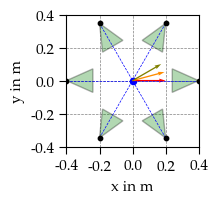

In [46]:
importlib.reload(sys.modules['src.camera_pose_visualizer_2D']) if 'src.camera_pose_visualizer_2D' in sys.modules else None
from src.camera_pose_visualizer_2D import CameraPoseVisualizer
# static scene    
visualizer = CameraPoseVisualizer([-0.4, 0.4], [-0.4, 0.4],figsize=(2.3,2.3))
visualizer.load_cameras(cams[0:n_cams],focal_length,aspect_ratio,sensor_width,scale=10,alpha=0.3,select_color='g',cam_center = True, point_size = 10)
visualizer.add_focuspoint(focuspoint, color='blue', marker='o', size=20)
visualizer.draw_lines_to_focuspoint(cams[0:n_cams],focuspoint, line_style='--', color='blue',linewidth = 0.5,alpha = 1)
visualizer.draw_rotation_axis([1, 0, 0], length=0.2, color='red', width=0.01, alpha=1, fontsize = 10)
visualizer.draw_rotation_axis([0.9659, 0.2588,0], length=0.2, color='darkorange', width=0.01, alpha=1, fontsize = 10)
visualizer.draw_rotation_axis([0.866, 0.5,0], length=0.2, color='olive', width=0.01, alpha=1, fontsize = 10)

#visualizer.draw_rotation_axis([1,0,0], length=0.2, color='darkorange', width=0.01, alpha=1, fontsize = 10)
#visualizer.draw_rotation_axis([0,1,0], length=0.2, color='olive', width=0.01, alpha=1, fontsize = 10)

visualizer.ax.set_xticks([-0.4,-0.2, 0, 0.2 ,0.4])
visualizer.save(output_path)
visualizer.show()